In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pynbody
import pynbody.plot.sph as sph

In [2]:
filepth = 'Starting-Stuff/IsoB_1000/GLX.0'
timestep = (['1000'])

filenom = (filepth+timestep[0])
dno = timestep[0]
gal = pynbody.load(filenom) 
print (gal.dm)

t_now =  gal.properties['time'].in_units('Myr')
timestr = str( np.round(float(t_now),1) )

#Put CoM in middle
pynbody.analysis.angmom.faceon(gal)

<FamilySubSnap "Starting-Stuff\IsoB_1000\GLX.01000::dm" len=1000000>


<Transformation faceon>

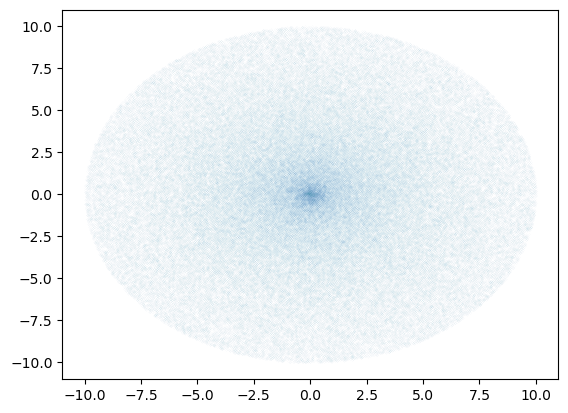

In [3]:
x = gal.dm['x']
y = gal.dm['y']

#age = gal.star['tform'].in_units('Myr') < 1000

rho = np.sqrt(x**2 + y**2)
phi = np.angle(x + 1j * y)

radii = 10
mask = (rho <= radii) * (rho >= -radii)

x = x[mask]
y = y[mask]

rho = rho[mask]
phi = phi[mask]

plt.plot(x, y, marker='.', linestyle='None', markersize=0.1, alpha=0.2)
#plt.gca().invert_xaxis()


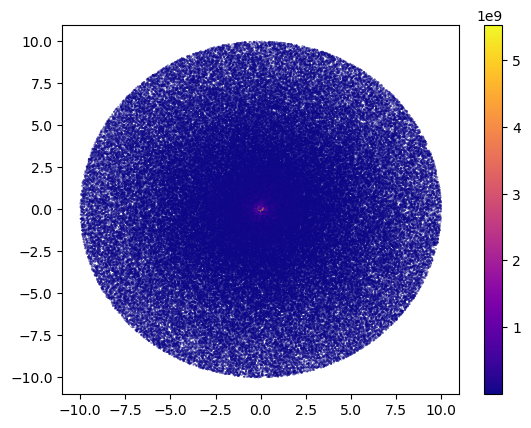

In [4]:
conc = gal.dm["rho"]
conc = conc[mask]
plt.clf()
plt.scatter(x, y, c=conc, cmap='plasma', s=0.05)#, alpha=0.05)
plt.colorbar()

<>:3: SyntaxWarning: invalid escape sequence '\;'
<>:4: SyntaxWarning: invalid escape sequence '\;'
<>:3: SyntaxWarning: invalid escape sequence '\;'
<>:4: SyntaxWarning: invalid escape sequence '\;'
/tmp/ipykernel_593/4089800708.py:3: SyntaxWarning: invalid escape sequence '\;'
  plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
/tmp/ipykernel_593/4089800708.py:4: SyntaxWarning: invalid escape sequence '\;'
  plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)


Text(0, 0.5, '$y \\;{\\rm [kpc]}$')

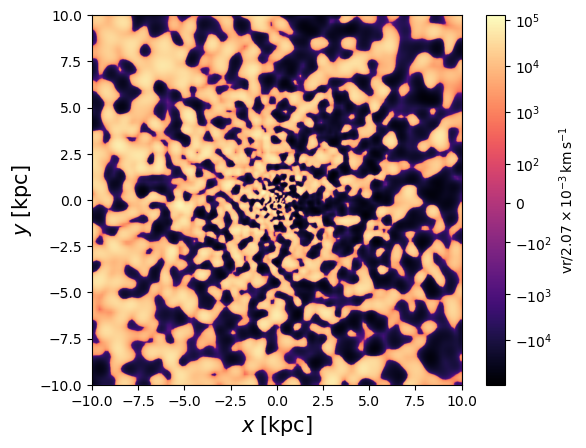

In [5]:
plt.clf()
sph.image(gal.dm,qty='vr',width='20 kpc',cmap='magma',show_cbar = True, resolution=1000)
plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)

In [19]:
res = 1000

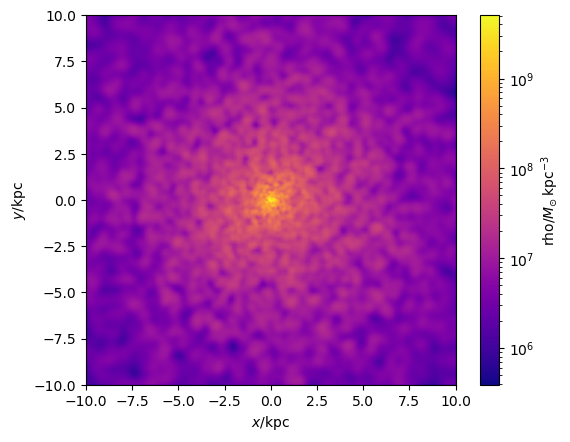

In [20]:
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)

dm=sph.image(gal.dm,qty='rho',width='20 kpc',cmap='plasma', resolution=res,
                       subplot=axG,show_cbar=True, return_array=True, log=True)

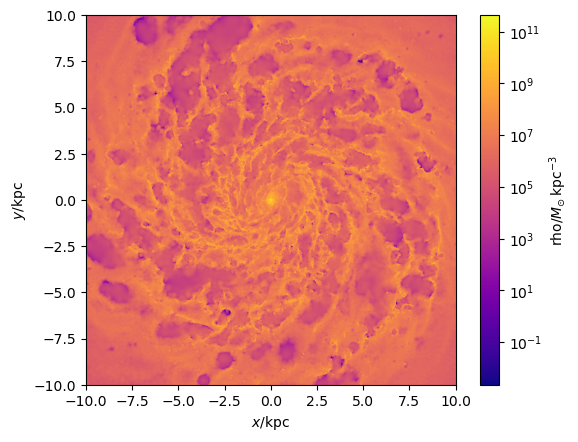

In [21]:
plt.clf()
figG=plt.figure(1)
axG=figG.add_subplot(1,1,1)

gas=sph.image(gal.gas,qty='rho',width='20 kpc',cmap='plasma', resolution=res,
                       subplot=axG,show_cbar=True, return_array=True, log=True)

<>:13: SyntaxWarning: invalid escape sequence '\;'
<>:14: SyntaxWarning: invalid escape sequence '\;'
<>:13: SyntaxWarning: invalid escape sequence '\;'
<>:14: SyntaxWarning: invalid escape sequence '\;'
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_37920\164947271.py:13: SyntaxWarning: invalid escape sequence '\;'
  plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
C:\Users\Shaurya\AppData\Local\Temp\ipykernel_37920\164947271.py:14: SyntaxWarning: invalid escape sequence '\;'
  plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)


([<matplotlib.axis.YTick at 0x22e6db88a50>,
 [Text(0, 0.0, '-10.0'),
  Text(0, 200.0, '-6.0'),
  Text(0, 400.0, '-2.0'),
  Text(0, 600.0, '2.0'),
  Text(0, 800.0, '6.0'),
  Text(0, 1000.0, '10.0')])

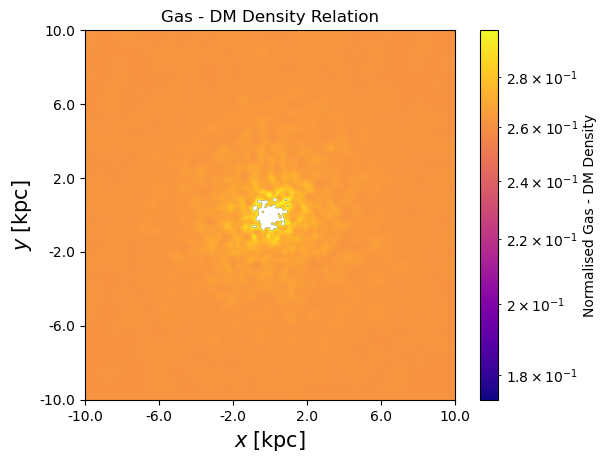

In [136]:
from matplotlib import colors

def norm(arr, n = 1):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n

relation = norm(gas) - norm(dm)
relation = norm(-relation)
relation[relation >= 0.3] = 0
plt.clf()
plt.imshow(relation, origin='lower', cmap='plasma', norm = colors.LogNorm())
plt.colorbar(label='Normalised Gas - DM Density')
plt.title('Gas - DM Density Relation')
plt.xlabel('$x \;{\\rm [kpc]}$',fontsize=15)
plt.ylabel('$y \;{\\rm [kpc]}$',fontsize=15)

xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]
plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

1. Run spiral structure/flocculency code on both gas/star and relation -> see if it changes anything
2. If they are both similar, i.e return same clusters then dark matter doesn't affect spiral structure? But it could also be that dark matter affects spiral structure -> more defined spiral arms?

([<matplotlib.axis.YTick at 0x22e42ab2fd0>,
 [Text(0, 0.0, '-10.0'),
  Text(0, 200.0, '-6.0'),
  Text(0, 400.0, '-2.0'),
  Text(0, 600.0, '2.0'),
  Text(0, 800.0, '6.0'),
  Text(0, 1000.0, '10.0')])

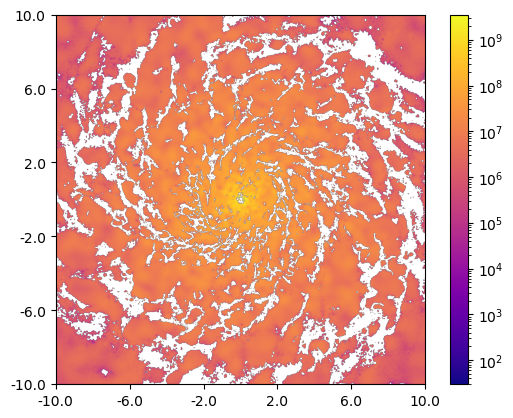

In [110]:
from matplotlib import colors

def norm(arr, n = 1):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n

relation = gas - dm
plt.clf()
plt.imshow(-relation, origin='lower', cmap='plasma', norm=colors.LogNorm())
plt.colorbar()
xticks = plt.xticks()[0][1:]
yticks = plt.yticks()[0][1:]
plt.xticks(xticks, np.round(xticks/res * 20 - 10,1))
plt.yticks(yticks, np.round(xticks/res * 20 - 10,1))

In [96]:
x1 = np.indices(relation.shape)[0].flatten()
x2 = np.indices(relation.shape)[1].flatten()
X = np.array([x1, x2]).T
Y = relation.flatten()

In [97]:
dens = np.mean(relation)
avg_dist = (dens * 1.5) ** (-1/3) 
avg_dist *= 1.5

In [98]:
from sklearn.cluster import DBSCAN

clf = DBSCAN(eps=np.sqrt(2))
clf.fit(X, sample_weight=Y)

,eps,np.float64(1.4142135623730951)
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [99]:
for i in range(-1, clf.labels_.max() + 1):
    print(i, np.sum(clf.labels_ == i))

-1 668701
0 17434
1 7469
2 3169
3 30296
4 63
5 25
6 22
7 39
8 43
9 33
10 7
11 258
12 97
13 23
14 62
15 9
16 57
17 34
18 59
19 24
20 25
21 9
22 27
23 23
24 92
25 14
26 30
27 20
28 28
29 22
30 25
31 29
32 76
33 56
34 45
35 34
36 37
37 70
38 65
39 82
40 15
41 9
42 160
43 197
44 57
45 38
46 19
47 30
48 43
49 15
50 20
51 35
52 27
53 4578
54 4916
55 12
56 73
57 18
58 327
59 38
60 23
61 14
62 44
63 1778
64 15
65 78
66 3403
67 764
68 40
69 34
70 23
71 37
72 12
73 94
74 32
75 22
76 26
77 41
78 11
79 2194
80 55
81 9
82 29
83 40
84 27
85 15
86 806
87 9204
88 340
89 64
90 64
91 646
92 25
93 21
94 38
95 30
96 84
97 59
98 1896
99 69
100 9
101 16
102 44
103 9
104 48
105 62345
106 222
107 164
108 25
109 1012
110 46
111 296
112 43
113 33
114 55
115 96
116 24
117 12
118 33
119 173
120 16
121 197
122 162
123 313
124 4841
125 1137
126 87
127 13
128 721
129 51
130 24
131 180
132 74
133 144
134 68
135 9
136 334
137 5
138 176
139 38
140 18
141 65
142 20
143 19
144 67
145 68
146 1783
147 42
148 52
149 37
150 

In [85]:
temp = X

In [100]:
X = norm(temp, 2) - 1
X = X * 10
X

array([[-10.        , -10.        ],
       [-10.        ,  -9.97997998],
       [-10.        ,  -9.95995996],
       ...,
       [ 10.        ,   9.95995996],
       [ 10.        ,   9.97997998],
       [ 10.        ,  10.        ]], shape=(1000000, 2))

<Figure size 640x480 with 0 Axes>

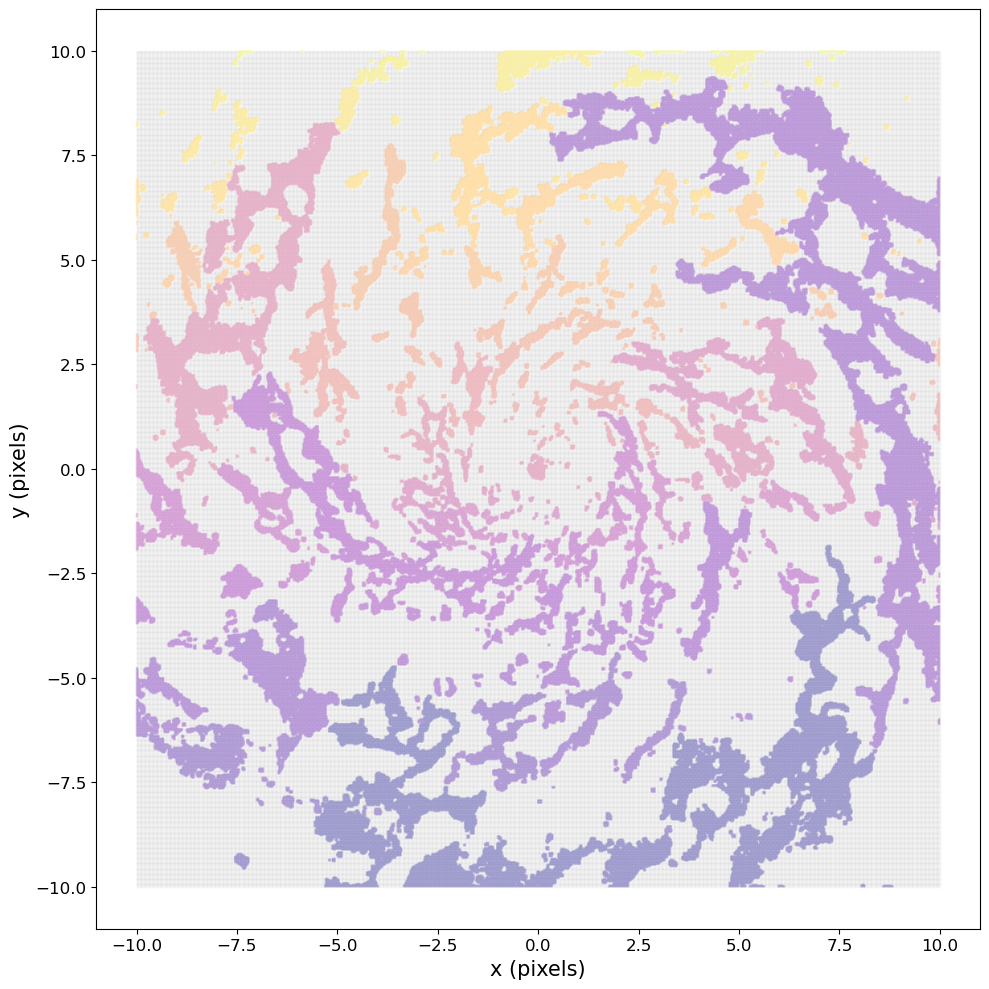

In [ ]:
outliers = clf.labels_ == -1

radius = 10 #kpc
plt.clf()
#make a scatter plot with points coloured according to the DBSCAN labels
cmap = plt.get_cmap("plasma")
colors = cmap((clf.labels_+1)/np.max(clf.labels_+1))

#do things with sample weights and gas particle weights?

def dbscan(ax, fs=15):
    ax.scatter(X[outliers,1], X[outliers,0], facecolor='black', marker='.',
            s=0.1, alpha=0.05)
    ax.scatter(X[~outliers,1], X[~outliers,0], facecolor=colors[~outliers], marker='.',
            s=0.1, alpha=0.3)
    ax.set_xlabel('x (kpc)', fontsize=fs)
    ax.set_ylabel('y (kpc)', fontsize=fs)
    ax.tick_params(axis='both', labelsize=12)
    
    

fig, ax = plt.subplots(figsize=(10,10))
dbscan(ax)

#fig.gca().invert_xaxis()
fig.tight_layout()

In [50]:
relation.reshape((-1, 1))

SimArray([[-4.9535312e+04],
          [-1.3420153e+05],
          [-2.1453203e+05],
          ...,
          [-1.3967935e+06],
          [-1.1141998e+06],
          [-8.3506262e+05]], shape=(1000000, 1), dtype=float32, 'Msol kpc**-3')

In [45]:
np.indices(relation.shape)[0]

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ...,
       [997, 997, 997, ..., 997, 997, 997],
       [998, 998, 998, ..., 998, 998, 998],
       [999, 999, 999, ..., 999, 999, 999]], shape=(1000, 1000))

In [47]:
np.indices(relation.shape)[1]

array([[  0,   1,   2, ..., 997, 998, 999],
       [  0,   1,   2, ..., 997, 998, 999],
       [  0,   1,   2, ..., 997, 998, 999],
       ...,
       [  0,   1,   2, ..., 997, 998, 999],
       [  0,   1,   2, ..., 997, 998, 999],
       [  0,   1,   2, ..., 997, 998, 999]], shape=(1000, 1000))

In [68]:
norm(gas) - norm(dm)

SimArray([[ 3.0100346e-06, -1.3649464e-05, -3.0308962e-05, ...,
           -1.8376112e-04, -1.4376640e-04, -1.0371208e-04],
          [-1.3381243e-05, -3.3825636e-05, -5.4329634e-05, ...,
           -2.4113059e-04, -1.9231439e-04, -1.4334917e-04],
          [-2.9683113e-05, -5.3852797e-05, -7.8201294e-05, ...,
           -2.9841065e-04, -2.4071336e-04, -1.8286705e-04],
          ...,
          [-2.9578805e-04, -3.7798285e-04, -4.6017766e-04, ...,
           -3.6489964e-04, -2.9677153e-04, -2.2873282e-04],
          [-2.3880601e-04, -3.0848384e-04, -3.7804246e-04, ...,
           -2.9709935e-04, -2.3934245e-04, -1.8158555e-04],
          [-1.8176436e-04, -2.3895502e-04, -2.9596686e-04, ...,
           -2.2938848e-04, -1.8194318e-04, -1.3455749e-04]],
         shape=(500, 500), dtype=float32, 'Msol kpc**-3')

In [143]:
x = gal.dm['x']
y = gal.dm['y']
conc = gal.dm["rho"]

#age = gal.star['tform'].in_units('Myr') < 1000

rho = np.sqrt(x**2 + y**2)
phi = np.angle(x + 1j * y)

radii = 10
mask = (rho <= radii) * (rho >= -radii)

x = x[mask]
y = y[mask]

rho = rho[mask]
phi = phi[mask]

conc = conc[mask]

dm = np.column_stack((x, y, conc))
dm

array([[-4.41086266e+00, -1.08376513e-01,  1.44193210e+07],
       [-8.59051322e+00,  2.09169753e-01,  3.09703137e+06],
       [-1.08055011e+00, -2.21701422e+00,  5.80537620e+07],
       ...,
       [-6.03215053e+00, -6.46620628e+00,  6.29520911e+06],
       [ 3.62391778e+00, -1.89156683e-01,  4.03321584e+07],
       [ 5.40092820e+00,  1.51070966e+00,  3.62331603e+06]],
      shape=(173804, 3))

In [15]:
x = gal.gas['x']
y = gal.gas['y']
conc = gal.gas["rho"]

#age = gal.star['tform'].in_units('Myr') < 1000

rho = np.sqrt(x**2 + y**2)
phi = np.angle(x + 1j * y)

radii = 10
mask = (rho <= radii) * (rho >= -radii)

x = x[mask]
y = y[mask]

rho = rho[mask]
phi = phi[mask]

conc = conc[mask]

gas = np.column_stack((x, y, conc))
gas

array([[ 1.00809246e-02,  2.23516273e-02,  8.73809183e+10],
       [-1.62201927e+00,  2.03096163e+00,  7.17291776e+08],
       [ 5.76246398e+00,  6.56672026e+00,  8.53740500e+06],
       ...,
       [-6.40892315e+00,  3.84325200e+00,  6.99053000e+05],
       [-2.09455782e-01, -1.27920717e+00,  1.91083100e+07],
       [-5.28091605e-01, -4.02778437e-01,  1.56917170e+07]],
      shape=(1762234, 3))

In [16]:
def norm(arr, n):
    return (arr - np.min(arr))/(np.max(arr) - np.min(arr)) * n

def bin(arr, bins):
    #arr = norm(arr, 60)
    norm = plt.hist(arr, bins=bins)[0]
    return norm

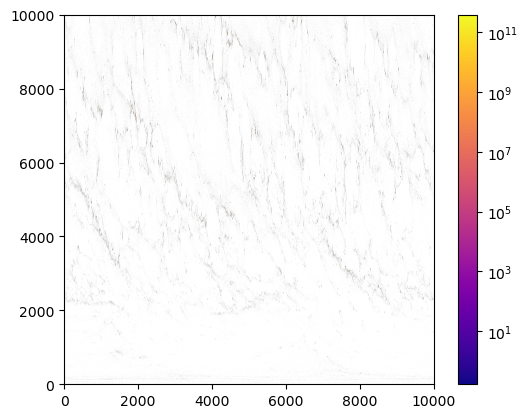

In [24]:
from matplotlib import colors

res = 10000
new_x = norm(phi, res) #(phi + 90) / 2 #bin(phi, 60)
new_y= norm(rho, res) #bin(np.log10(rho), 60)

x_range = int(np.max(new_x) - np.min(new_y)) + 1
y_range = int(np.max(new_x)- np.min(new_y)) + 1

xint = np.rint(new_x).astype(int)
yint = np.rint(new_y).astype(int)
im4 = np.zeros((x_range, y_range))
counts = np.zeros((x_range, y_range))

mask = conc != 0

np.add.at(im4, (yint[mask], xint[mask]), conc[mask])
np.add.at(counts, (yint[mask], xint[mask]), 1)

im4[counts != 0] = im4[counts != 0] / counts[counts != 0]
plt.clf()
plt.imshow(im4, origin='lower', cmap='plasma', norm=colors.LogNorm())
plt.colorbar()